In [1]:
import matplotlib.pyplot as plt
import numpy as np
import requests
from io import BytesIO

##1. Load the dataset and labels

In [2]:
# Fetch the sprites dataset and labels from github repo
res_labels = requests.get('https://github.com/vinay-jose/intro-to-diffusion-models/raw/main/dataset/sprite_labels_nc_1788_16x16.npy')
res_sprites = requests.get('https://github.com/vinay-jose/intro-to-diffusion-models/raw/main/dataset/sprites_1788_16x16.npy')

In [3]:
print(f"Response code for fetching labels: {res_labels.status_code}")
print(f"Response code for fetching sprites: {res_sprites.status_code}")

Response code for fetching labels: 200
Response code for fetching sprites: 200


In [4]:
# Load the sprites dataset and labels as numpy array
img_array = np.load(BytesIO(res_sprites.content))
label_array = np.load(BytesIO(res_labels.content))

In [5]:
print(f"Labels data loaded as numpy array with dimensions: {label_array.shape}")
print(f"Sprites data loaded as numpy array with dimensions: {img_array.shape}")

Labels data loaded as numpy array with dimensions: (89400, 5)
Sprites data loaded as numpy array with dimensions: (89400, 16, 16, 3)


##2. Visualize and understand the data

1


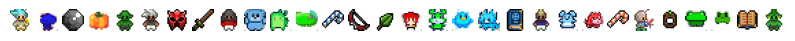

2


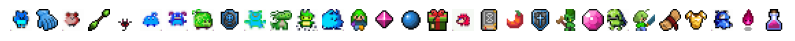

3


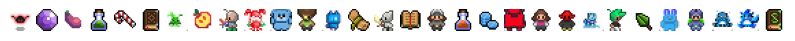

4


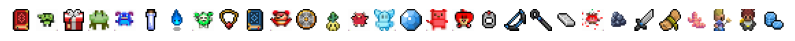

5


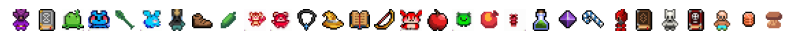

In [6]:
# Display randomly selected sprites
number_of_rows = 5
# i = 0
for k in range(number_of_rows):
    # Create a plot with one row and 'ncols' columns of subplots
    print(k+1) # print row index
    fig, axes = plt.subplots(nrows=1, ncols=30, figsize=(10, 10))
    for ax in axes.flat:
      i = np.random.randint(0, len(label_array)) # select an index at random
      ax.imshow(img_array[i], cmap='gray')
      ax.axis('off')
      # i+=1
    # Show the plot
    plt.show()

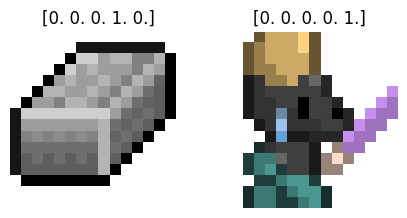

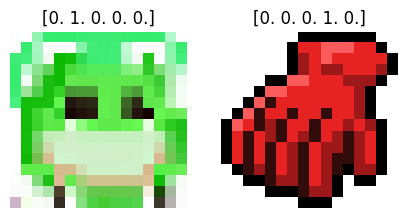

In [7]:
# Display randomly selected sprites along with their labels
for k in range(1, 3):
    # Create a plot with one row and 'ncols' columns of subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 5))
    for ax in axes.flat:
      i = np.random.randint(0, len(label_array)) # select an index at random
      ax.imshow(img_array[i], cmap='gray')
      ax.axis('off')
      ax.title.set_text(str(label_array[i, :]))
    # Show the plot containing 'ncols' subplots
    plt.show()

In [8]:
# Each label contain 5 parameters that contain information regarding the following characteristics:
# hero, non-hero, food, spell, side-facing
# This labelling of the dataset allows us to add context to the images generated by the trained model (Discussed in Lab 3)

# The following code is just to debug the labels in the dataset. This might help improve the intuition on the data.
# hero = sum(label_array[:,0])
# non_hero = sum(label_array[:,1])
# food = sum(label_array[:,2])
# spell = sum(label_array[:,3])
# side_facing = sum(label_array[:,4])

# print(hero + non_hero + food + spell + side_facing == len(label_array))

# condition = label_array[:,0]==1.0
# # hero_array = label_array[condition]
# hero_indices = np.where(condition)[0]
# print(len(hero_indices))

# condition = label_array[:,1]==1.0
# # non_hero_array = label_array[condition]
# non_hero_indices = np.where(condition)[0]
# print(len(non_hero_indices))

# condition = label_array[:,2]==1.0
# # food_array = label_array[condition]
# food_indices = np.where(condition)[0]
# print(len(food_indices))

# condition = label_array[:,3]==1.0
# # spell_array = label_array[condition]
# spell_indices = np.where(condition)[0]
# print(len(spell_indices))

# condition = label_array[:,4]==1.0
# # side_facing_array = label_array[condition]
# side_facing_indices = np.where(condition)[0]
# print(len(side_facing_indices))

# print(len(hero_indices) + len(non_hero_indices) + len(food_indices) + len(spell_indices) + len(side_facing_indices) == len(label_array))

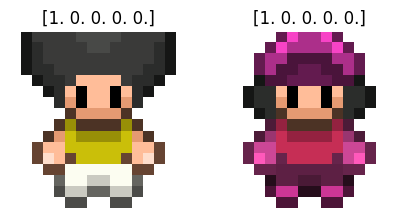

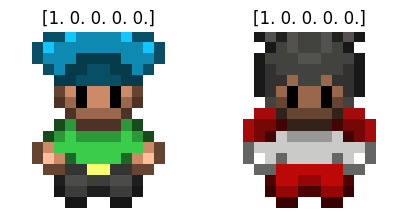

In [9]:
# Display randomly selected sprites of a particular kind along with their labels

"""j can have values 0, 1, 2, 3, 4
        0 - hero
        1 - non-hero
        2 - food
        3 - spell
        4 - side_facing"""
j = 0
condition = label_array[:,j]==1.0
indices = np.where(condition)[0]

for k in range(1, 3):
    # Create a plot with one row and 'ncols' columns of subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 5))
    for ax in axes.flat:
      i = np.random.choice(indices) # select an index at random
      ax.imshow(img_array[i], cmap='gray')
      ax.axis('off')
      ax.title.set_text(str(label_array[i, :]))
    # Show the plot containing 'ncols' subplots
    plt.show()

# Acknowledgments
Sprites by ElvGames, [FrootsnVeggies](https://zrghr.itch.io/froots-and-veggies-culinary-pixels) and  [kyrise](https://kyrise.itch.io/)   
This code is modified from, https://github.com/cloneofsimo/minDiffusion   
This work is based on [How Diffusion Models Work by DeepLearning.AI](https://learn.deeplearning.ai/diffusion-models/)
